In [9]:
import numpy as np
from matplotlib.pyplot import *
import basic
import camb

In [39]:
cpmodel = 'modelw'
#model = 'RT'
model = 'GM'
#model = 'SC'
zcmb = 1088.69
zm   = 1.
zs   = [zcmb,zcmb,zcmb]
#zmin, zmax = 0.0001, 1088.69
zmin, zmax = 0.0001, 40.
zn = 50
btype = 'kkk'
#btype = 'gkk'
#btype = 'ggk'
lmin = 1
lmax = 2048
olmin = lmin
olmax = lmax
L = np.linspace(0,olmax,olmax+1)
z, dz = basic.bispec.zpoints(zmin,zmax,zn)

In [37]:
pars = camb.CAMBparams()
pars.set_cosmology(H0=70., ombh2=0.046*.7**2, omch2=0.233*.7**2)
pars.InitPower.set_params(ns=0.97,As=2.25e-9)
pars.set_matter_power(redshifts=[0.], kmax=20.)
results = camb.get_results(pars)
k, __, pk = results.get_matter_power_spectrum(minkh=1e-4, maxkh=10, npoints=1000)
s8 = np.array(results.get_sigma8())

In [38]:
#D = '/global/homes/t/toshiyan/Work/Ongoing/bispec/data/'
#k, pk0 = np.loadtxt( D+cpmodel+'/Pk/Pklin.dat', unpack=True )
kn = np.size(k)

In [33]:
print(kn)

1000


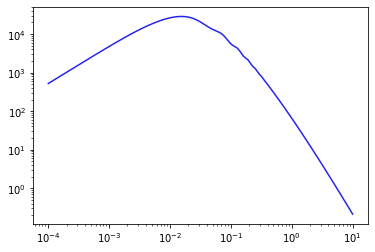

In [35]:
#oglog(k,pk0)
loglog(k,pk[0])

In [40]:
if btype == 'kkk': 
    dNdz = None
else:
    dNdz = basic.galaxy.dndz_sf(z,2.,1.,zm)

bl0, pb0 = basic.bispec.bispeclens('equi',cpmodel,model,z,dz,zs,lmin,lmax,k,pk[0],btype=btype,dNdz=dNdz)
bl1, pb1 = basic.bispec.bispeclens('fold',cpmodel,model,z,dz,zs,lmin,lmax,k,pk[0],btype=btype,dNdz=dNdz)
bl2, pb2 = basic.bispec.bispeclens('sque',cpmodel,model,z,dz,zs,lmin,lmax,k,pk[0],btype=btype,dNdz=dNdz)
bl3, pb3 = basic.bispec.bispeclens('angl',cpmodel,model,z,dz,zs,lmin,lmax,k,pk[0],btype=btype,dNdz=dNdz)
#np.savetxt('test_zs'+str(zs[0])+'-'+str(zs[1])+'-'+str(zs[2])+'.dat',np.array((L[1:],bl0,bl1,bl2,bl3,pb0,pb1,pb2,pb3)).T)

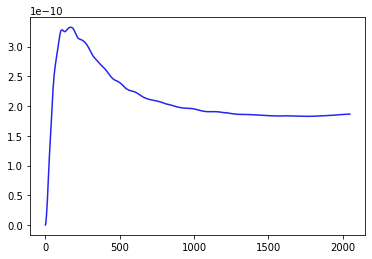

In [41]:
plot(L[1:]**2*bl0)